In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
import numpy as np

In [18]:
base_full = pd.read_csv('C:\\Users\\flavi\\Google Drive\\Estudos\\Formação em Data Science\\Agrupamento\\Bases\\Mall_Customers.csv')
base_full.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [19]:
base_full.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

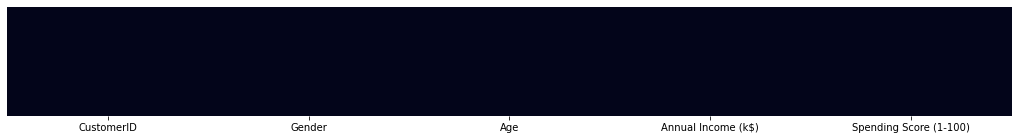

In [20]:
plt.figure(figsize=(18,2))
sns.heatmap(base_full.isnull(), cbar=False, yticklabels=False);

In [21]:
base_full.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
def standarscaler(df, lista):
    stderscaler = StandardScaler()
    for item in lista:
        df[[item]] = stderscaler.fit_transform(df[[item]])
    return df

In [23]:
lista = ['Age','Annual Income (k$)','Spending Score (1-100)']
df_result_StandScaler = standarscaler(base_full,lista)
le = LabelEncoder()
df_result_StandScaler['Gender'] = le.fit_transform(df_result_StandScaler['Gender'].values)
df_result_StandScaler.head()

CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1       1 -1.424569           -1.738999               -0.434801
1           2       1 -1.281035           -1.738999                1.195704
2           3       0 -1.352802           -1.700830               -1.715913
3           4       0 -1.137502           -1.700830                1.040418
4           5       0 -0.563369           -1.662660               -0.395980

In [24]:
df_result_StandScaler.describe()

CustomerID      Gender           Age  Annual Income (k$)  \
count  200.000000  200.000000  2.000000e+02        2.000000e+02   
mean   100.500000    0.440000 -9.603429e-17       -6.128431e-16   
std     57.879185    0.497633  1.002509e+00        1.002509e+00   
min      1.000000    0.000000 -1.496335e+00       -1.738999e+00   
25%     50.750000    0.000000 -7.248436e-01       -7.275093e-01   
50%    100.500000    0.000000 -2.045351e-01        3.587926e-02   
75%    150.250000    1.000000  7.284319e-01        6.656748e-01   
max    200.000000    1.000000  2.235532e+00        2.917671e+00   

       Spending Score (1-100)  
count            2.000000e+02  
mean            -1.121325e-16  
std              1.002509e+00  
min             -1.910021e+00  
25%             -5.997931e-01  
50%             -7.764312e-03  
75%              8.851316e-01  
max              1.894492e+00

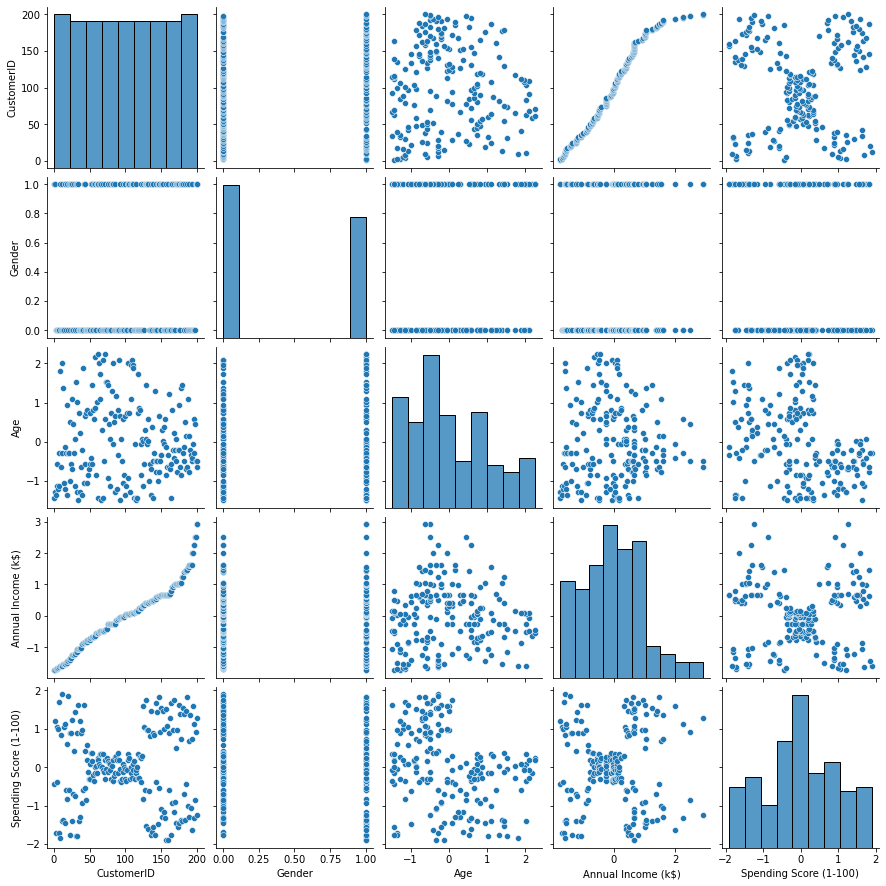

In [25]:
sns.pairplot(df_result_StandScaler)
plt.show()

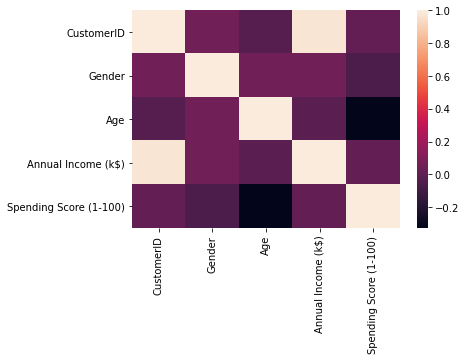

In [26]:
sns.heatmap(df_result_StandScaler.corr())
plt.show()

In [27]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [28]:
hierarq_model_ward = AgglomerativeClustering(affinity='euclidean', linkage = 'ward',distance_threshold=0, n_clusters=None).fit(df_result_StandScaler.iloc[:,2:])
hierarq_model_complete = AgglomerativeClustering(affinity='euclidean', linkage = 'complete',distance_threshold=0, n_clusters=None).fit(df_result_StandScaler.iloc[:,2:])
hierarq_model_average = AgglomerativeClustering(affinity='euclidean', linkage = 'average',distance_threshold=0, n_clusters=None).fit(df_result_StandScaler.iloc[:,2:])
hierarq_model_single = AgglomerativeClustering(affinity='euclidean', linkage = 'single',distance_threshold=0, n_clusters=None).fit(df_result_StandScaler.iloc[:,2:])

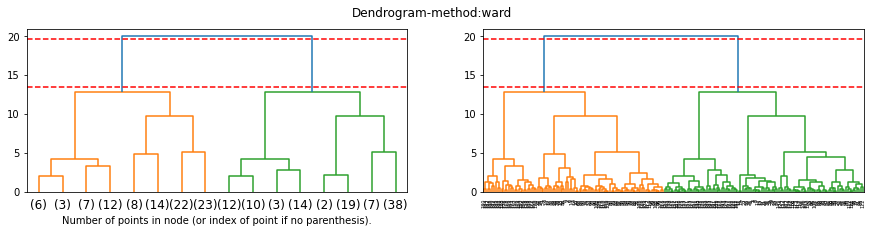

In [32]:
plt.figure(figsize=(15,3))
plt.suptitle('Dendrogram-method:ward')
plt.subplot(1,2,1)
plot_dendrogram(hierarq_model_ward, truncate_mode='level', p=3)
plt.axhline(y=19.7, color = 'r', linestyle = '--')
plt.axhline(y=13.5, color = 'r', linestyle = '--')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.subplot(1,2,2)
plt.axhline(y=19.7, color = 'r', linestyle = '--')
plt.axhline(y=13.5, color = 'r', linestyle = '--')
distance_matrix_ward = linkage(df_result_StandScaler.iloc[:,2:], method = 'ward', metric = 'euclidean')
dn = dendrogram(distance_matrix_ward)
plt.show()

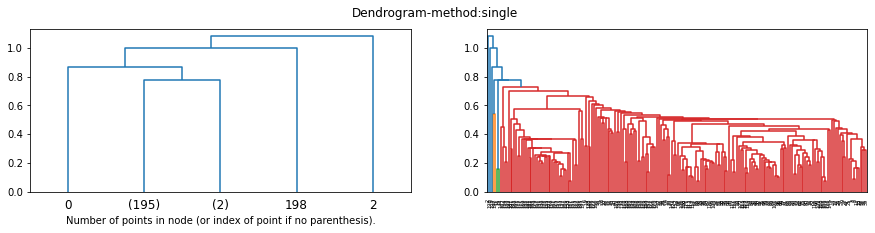

In [14]:
plt.figure(figsize=(15,3))
plt.suptitle('Dendrogram-method:single')
plt.subplot(1,2,1)
plot_dendrogram(hierarq_model_single, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.subplot(1,2,2)
distance_matrix_sinle = linkage(df_result_StandScaler.iloc[:,2:], method = 'single', metric = 'euclidean')
dn1 = dendrogram(distance_matrix_sinle)
plt.show()

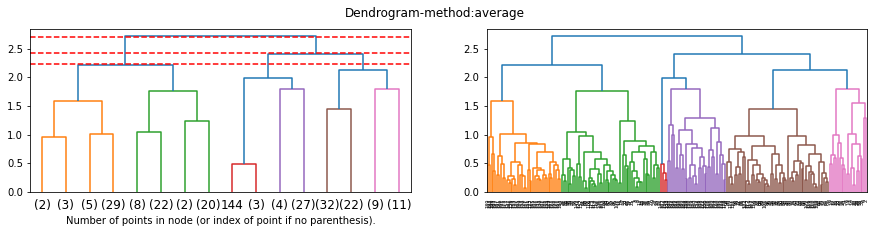

In [39]:
plt.figure(figsize=(15,3))
plt.suptitle('Dendrogram-method:average')
plt.subplot(1,2,1)
plt.axhline(y=2.7, color = 'r', linestyle = '--')
plt.axhline(y=2.43, color = 'r', linestyle = '--')

plt.axhline(y=2.23, color = 'r', linestyle = '--')
#plt.axhline(y=2.0, color = 'r', linestyle = '--')

plot_dendrogram(hierarq_model_average, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.subplot(1,2,2)
distance_matrix_sinle = linkage(df_result_StandScaler.iloc[:,2:], method = 'average', metric = 'euclidean')
dn1 = dendrogram(distance_matrix_sinle)
plt.show()

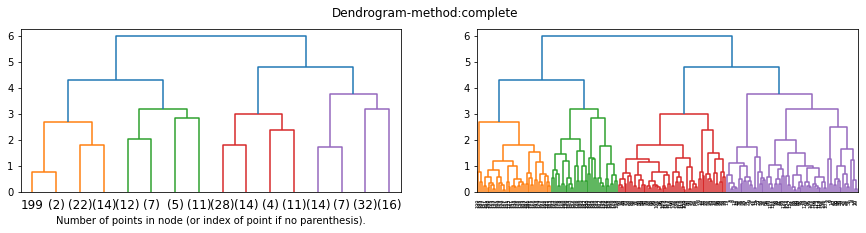

In [16]:
plt.figure(figsize=(15,3))
plt.suptitle('Dendrogram-method:complete')
plt.subplot(1,2,1)
plot_dendrogram(hierarq_model_complete, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.subplot(1,2,2)
distance_matrix_sinle = linkage(df_result_StandScaler.iloc[:,2:], method = 'complete', metric = 'euclidean')
dn1 = dendrogram(distance_matrix_sinle)
plt.show()

In [52]:
print('Calinski-Harabasz Index quanto maior a pontuação, melhores são os desempenhos')
print('Dunn Index quanto maior o valor, melhor é o agrupamento.')
print()
hierarq_model_ward = AgglomerativeClustering(affinity='euclidean', linkage = 'ward').fit(df_result_StandScaler.iloc[:,2:])
df_result_StandScaler['labels'] = hierarq_model_ward.labels_
print('Calinski-Harabasz Index: ward = ',davies_bouldin_score(df_result_StandScaler.iloc[:, 0:5], np.ravel(df_result_StandScaler.iloc[:, 5:])))
print('Davies-Bouldin Index: ward= ',calinski_harabasz_score(df_result_StandScaler.iloc[:, 0:5], np.ravel(df_result_StandScaler.iloc[:, 5:])))
print()
hierarq_model_complete = AgglomerativeClustering(affinity='euclidean', linkage = 'complete').fit(df_result_StandScaler.iloc[:,2:])
df_result_StandScaler['labels'] = hierarq_model_complete.labels_
print('Calinski-Harabasz Index: complete = ',davies_bouldin_score(df_result_StandScaler.iloc[:, 0:5], np.ravel(df_result_StandScaler.iloc[:, 5:])))
print('Davies-Bouldin Index: complete= ',calinski_harabasz_score(df_result_StandScaler.iloc[:, 0:5], np.ravel(df_result_StandScaler.iloc[:, 5:])))
print()
hierarq_model_average = AgglomerativeClustering(affinity='euclidean', linkage = 'average').fit(df_result_StandScaler.iloc[:,2:])
df_result_StandScaler['labels'] = hierarq_model_average.labels_
print('Calinski-Harabasz Index: average = ',davies_bouldin_score(df_result_StandScaler.iloc[:, 0:5], np.ravel(df_result_StandScaler.iloc[:, 5:])))
print('Davies-Bouldin Index: average= ',calinski_harabasz_score(df_result_StandScaler.iloc[:, 0:5], np.ravel(df_result_StandScaler.iloc[:, 5:])))
print()
hierarq_model_single = AgglomerativeClustering(affinity='euclidean', linkage = 'single').fit(df_result_StandScaler.iloc[:,2:])
df_result_StandScaler['labels'] = hierarq_model_single.labels_
print('Calinski-Harabasz Index: single = ',davies_bouldin_score(df_result_StandScaler.iloc[:, 0:5], np.ravel(df_result_StandScaler.iloc[:, 5:])))
print('Davies-Bouldin Index: single= ',calinski_harabasz_score(df_result_StandScaler.iloc[:, 0:5], np.ravel(df_result_StandScaler.iloc[:, 5:])))


Calinski-Harabasz Index quanto maior a pontuação, melhores são os desempenhos
Dunn Index quanto maior o valor, melhor é o agrupamento.

Calinski-Harabasz Index: ward =  21.588303642051812
Davies-Bouldin Index: ward=  0.31893708476574373

Calinski-Harabasz Index: complete =  0.5023428019361812
Davies-Bouldin Index: complete=  484.3946709311619

Calinski-Harabasz Index: average =  21.588303642051812
Davies-Bouldin Index: average=  0.31893708476574373

Calinski-Harabasz Index: single =  21.588303642051812
Davies-Bouldin Index: single=  0.31893708476574373
